In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.exceptions import FitFailedWarning



In [2]:
df=pd.read_csv('/content/biased_leukemia_dataset.csv')

In [3]:
df

Patient_ID  Age  Gender    Country  WBC_Count  RBC_Count  \
0                1   52    Male      China       2698       5.36   
1                2   15  Female      China       4857       4.81   
2                3   72    Male     France       9614       5.17   
3                4   61    Male     Brazil       6278       5.41   
4                5   21    Male     Brazil       8342       4.78   
...            ...  ...     ...        ...        ...        ...   
143189      143190   11    Male  Argentina       7525       5.30   
143190      143191   77  Female      China       7258       4.48   
143191      143192   22  Female        USA       6321       4.94   
143192      143193   14  Female      India       8039       5.45   
143193      143194   20    Male     France       7372       5.19   

        Platelet_Count  Hemoglobin_Level  Bone_Marrow_Blasts Genetic_Mutation  \
0               262493              12.2                  72              Yes   
1               277877              11.9                  97              Yes   
2               319600              13.4                  94               No   
3               215200              11.6                  50               No   
4               309169              14.3                  28               No   
...                ...               ...                 ...              ...   
143189          240260              12.8                  74               No   
143190          317102              13.4                  51               No   
143191          300353              10.3                  56               No   
143192          237054              11.9                  70               No   
143193          253460               8.4                  34               No   

        ... Alcohol_Consumption Radiation_Exposure Infection_History   BMI  \
0       ...                  No                 No                No  24.0   
1       ...                  No                 No                No  28.7   
2       ...                 Yes                 No                No  27.7   
3       ...                  No                 No                No  31.6   
4       ...                  No                 No                No  22.3   
...     ...                 ...                ...               ...   ...   
143189  ...                  No                 No               Yes  25.5   
143190  ...                 Yes                 No                No  27.5   
143191  ...                  No                 No                No  22.7   
143192  ...                  No                 No                No  21.8   
143193  ...                  No                 No               Yes  28.5   

       Chronic_Illness  Immune_Disorders       Ethnicity Socioeconomic_Status  \
0                   No                No  Ethnic_Group_B                  Low   
1                   No                No  Ethnic_Group_A                  Low   
2                   No                No  Ethnic_Group_B                  Low   
3                   No                No  Ethnic_Group_A               Medium   
4                   No                No  Ethnic_Group_B                  Low   
...                ...               ...             ...                  ...   
143189              No                No  Ethnic_Group_A               Medium   
143190              No                No  Ethnic_Group_C                  Low   
143191              No                No  Ethnic_Group_C               Medium   
143192             Yes                No  Ethnic_Group_A               Medium   
143193             Yes               Yes  Ethnic_Group_B                  Low   

       Urban_Rural Leukemia_Status  
0            Rural        Negative  
1            Urban        Positive  
2            Urban        Negative  
3            Rural        Negative  
4            Rural        Negative  
...            ...             ...  
143189       Urban        Negative  
143190      

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143194 entries, 0 to 143193
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Patient_ID            143194 non-null  int64  
 1   Age                   143194 non-null  int64  
 2   Gender                143194 non-null  object 
 3   Country               143194 non-null  object 
 4   WBC_Count             143194 non-null  int64  
 5   RBC_Count             143194 non-null  float64
 6   Platelet_Count        143194 non-null  int64  
 7   Hemoglobin_Level      143194 non-null  float64
 8   Bone_Marrow_Blasts    143194 non-null  int64  
 9   Genetic_Mutation      143194 non-null  object 
 10  Family_History        143194 non-null  object 
 11  Smoking_Status        143194 non-null  object 
 12  Alcohol_Consumption   143194 non-null  object 
 13  Radiation_Exposure    143194 non-null  object 
 14  Infection_History     143194 non-null  object 
 15  

In [5]:
df.describe()

Patient_ID            Age      WBC_Count      RBC_Count  \
count  143194.00000  143194.000000  143194.000000  143194.000000   
mean    71597.50000      44.945200    7001.289879       4.998193   
std     41336.69156      25.737805    2007.444410       0.500298   
min         1.00000       1.000000   -1602.000000       2.940000   
25%     35799.25000      23.000000    5644.250000       4.660000   
50%     71597.50000      45.000000    7007.000000       5.000000   
75%    107395.75000      67.000000    8352.000000       5.340000   
max    143194.00000      89.000000   15586.000000       7.150000   

       Platelet_Count  Hemoglobin_Level  Bone_Marrow_Blasts            BMI  
count   143194.000000     143194.000000       143194.000000  143194.000000  
mean    249933.012137         13.498334           49.547984      24.990679  
std      49842.308243          1.996714           28.837607       4.999786  
min      46069.000000          4.700000            0.000000       2.800000  
25%     216372.000000         12.100000           25.000000      21.600000  
50%     250248.500000         13.500000           50.000000      25.000000  
75%     283603.500000         14.800000           75.000000      28.300000  
max     460325.000000         22.200000           99.000000      49.100000

In [6]:
df.isnull().sum()

Patient_ID              0
Age                     0
Gender                  0
Country                 0
WBC_Count               0
RBC_Count               0
Platelet_Count          0
Hemoglobin_Level        0
Bone_Marrow_Blasts      0
Genetic_Mutation        0
Family_History          0
Smoking_Status          0
Alcohol_Consumption     0
Radiation_Exposure      0
Infection_History       0
BMI                     0
Chronic_Illness         0
Immune_Disorders        0
Ethnicity               0
Socioeconomic_Status    0
Urban_Rural             0
Leukemia_Status         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143194 entries, 0 to 143193
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Patient_ID            143194 non-null  int64  
 1   Age                   143194 non-null  int64  
 2   Gender                143194 non-null  object 
 3   Country               143194 non-null  object 
 4   WBC_Count             143194 non-null  int64  
 5   RBC_Count             143194 non-null  float64
 6   Platelet_Count        143194 non-null  int64  
 7   Hemoglobin_Level      143194 non-null  float64
 8   Bone_Marrow_Blasts    143194 non-null  int64  
 9   Genetic_Mutation      143194 non-null  object 
 10  Family_History        143194 non-null  object 
 11  Smoking_Status        143194 non-null  object 
 12  Alcohol_Consumption   143194 non-null  object 
 13  Radiation_Exposure    143194 non-null  object 
 14  Infection_History     143194 non-null  object 
 15  

In [8]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country', 'WBC_Count', 'RBC_Count',
       'Platelet_Count', 'Hemoglobin_Level', 'Bone_Marrow_Blasts',
       'Genetic_Mutation', 'Family_History', 'Smoking_Status',
       'Alcohol_Consumption', 'Radiation_Exposure', 'Infection_History', 'BMI',
       'Chronic_Illness', 'Immune_Disorders', 'Ethnicity',
       'Socioeconomic_Status', 'Urban_Rural', 'Leukemia_Status'],
      dtype='object')

In [9]:
df

Patient_ID  Age  Gender    Country  WBC_Count  RBC_Count  \
0                1   52    Male      China       2698       5.36   
1                2   15  Female      China       4857       4.81   
2                3   72    Male     France       9614       5.17   
3                4   61    Male     Brazil       6278       5.41   
4                5   21    Male     Brazil       8342       4.78   
...            ...  ...     ...        ...        ...        ...   
143189      143190   11    Male  Argentina       7525       5.30   
143190      143191   77  Female      China       7258       4.48   
143191      143192   22  Female        USA       6321       4.94   
143192      143193   14  Female      India       8039       5.45   
143193      143194   20    Male     France       7372       5.19   

        Platelet_Count  Hemoglobin_Level  Bone_Marrow_Blasts Genetic_Mutation  \
0               262493              12.2                  72              Yes   
1               277877              11.9                  97              Yes   
2               319600              13.4                  94               No   
3               215200              11.6                  50               No   
4               309169              14.3                  28               No   
...                ...               ...                 ...              ...   
143189          240260              12.8                  74               No   
143190          317102              13.4                  51               No   
143191          300353              10.3                  56               No   
143192          237054              11.9                  70               No   
143193          253460               8.4                  34               No   

        ... Alcohol_Consumption Radiation_Exposure Infection_History   BMI  \
0       ...                  No                 No                No  24.0   
1       ...                  No                 No                No  28.7   
2       ...                 Yes                 No                No  27.7   
3       ...                  No                 No                No  31.6   
4       ...                  No                 No                No  22.3   
...     ...                 ...                ...               ...   ...   
143189  ...                  No                 No               Yes  25.5   
143190  ...                 Yes                 No                No  27.5   
143191  ...                  No                 No                No  22.7   
143192  ...                  No                 No                No  21.8   
143193  ...                  No                 No               Yes  28.5   

       Chronic_Illness  Immune_Disorders       Ethnicity Socioeconomic_Status  \
0                   No                No  Ethnic_Group_B                  Low   
1                   No                No  Ethnic_Group_A                  Low   
2                   No                No  Ethnic_Group_B                  Low   
3                   No                No  Ethnic_Group_A               Medium   
4                   No                No  Ethnic_Group_B                  Low   
...                ...               ...             ...                  ...   
143189              No                No  Ethnic_Group_A               Medium   
143190              No                No  Ethnic_Group_C                  Low   
143191              No                No  Ethnic_Group_C               Medium   
143192             Yes                No  Ethnic_Group_A               Medium   
143193             Yes               Yes  Ethnic_Group_B                  Low   

       Urban_Rural Leukemia_Status  
0            Rural        Negative  
1            Urban        Positive  
2            Urban        Negative  
3            Rural        Negative  
4            Rural        Negative  
...            ...             ...  
143189       Urban        Negative  
143190      

# Exploratory Data Analysis

<ipython-input-10-cf251170fe6d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=df,palette='viridis',order=df[col].value_counts().index)


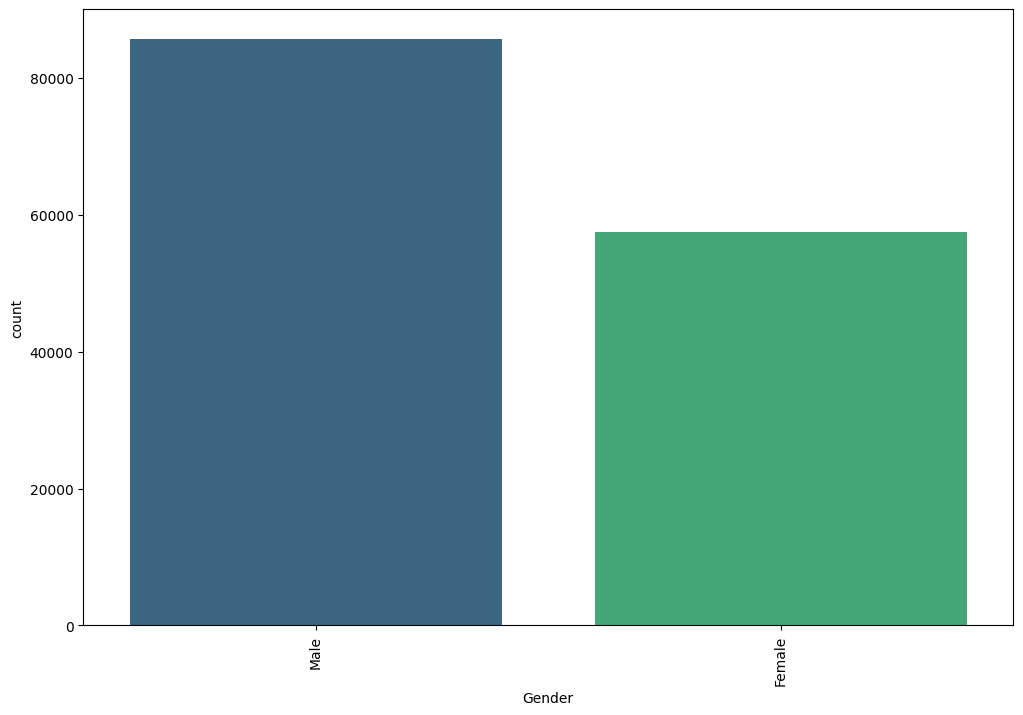

<ipython-input-10-cf251170fe6d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=df,palette='viridis',order=df[col].value_counts().index)


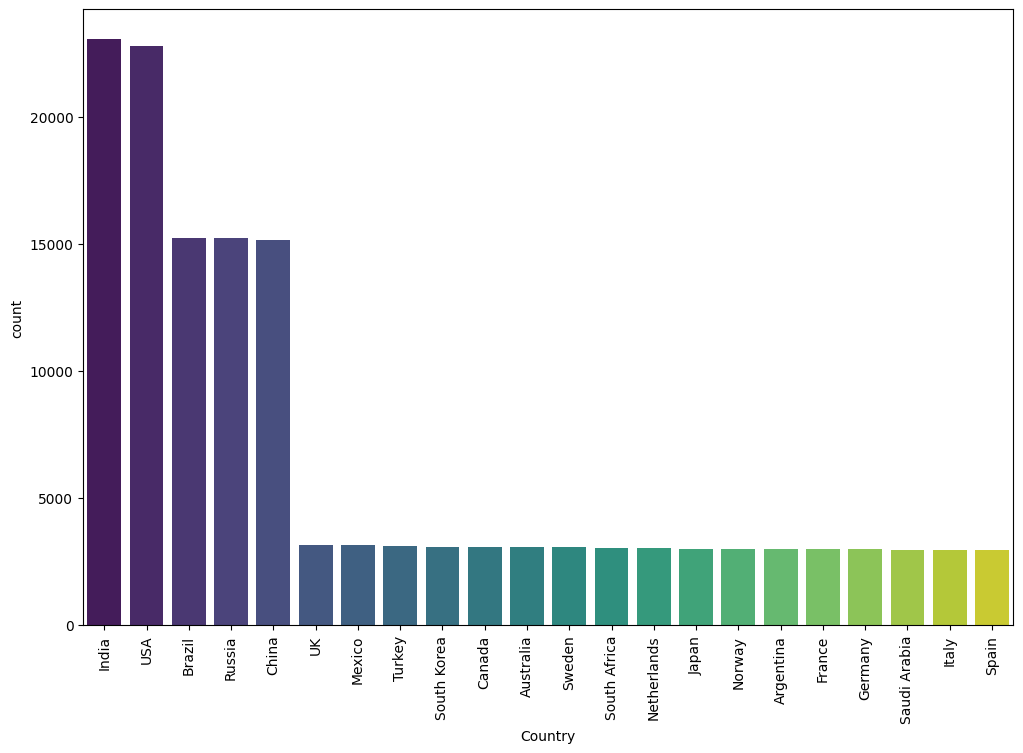

<ipython-input-10-cf251170fe6d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=df,palette='viridis',order=df[col].value_counts().index)


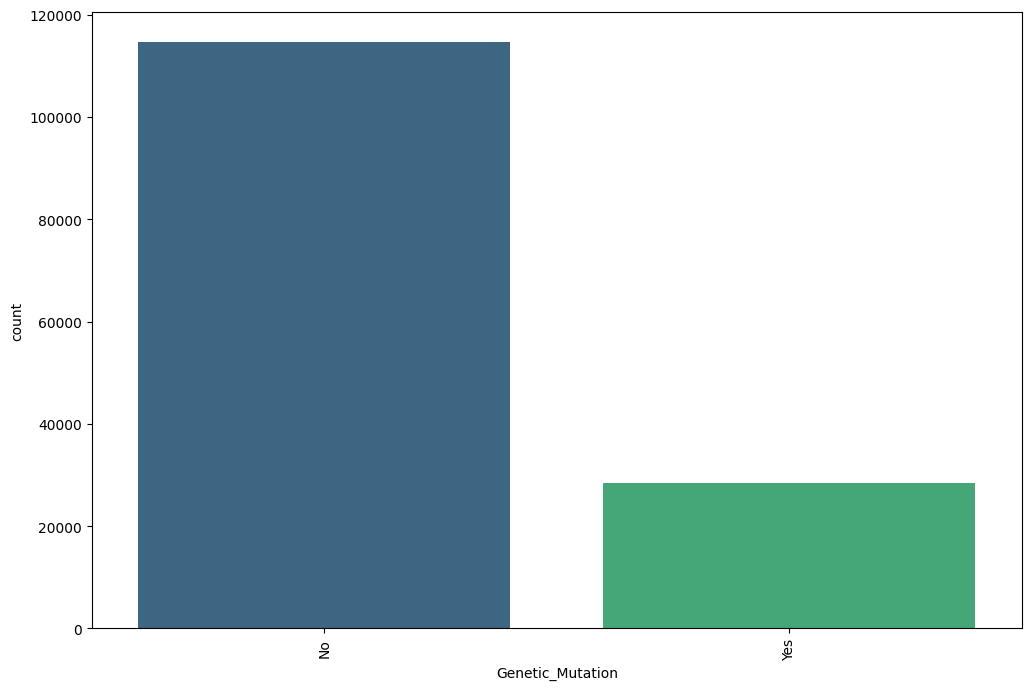

<ipython-input-10-cf251170fe6d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=df,palette='viridis',order=df[col].value_counts().index)


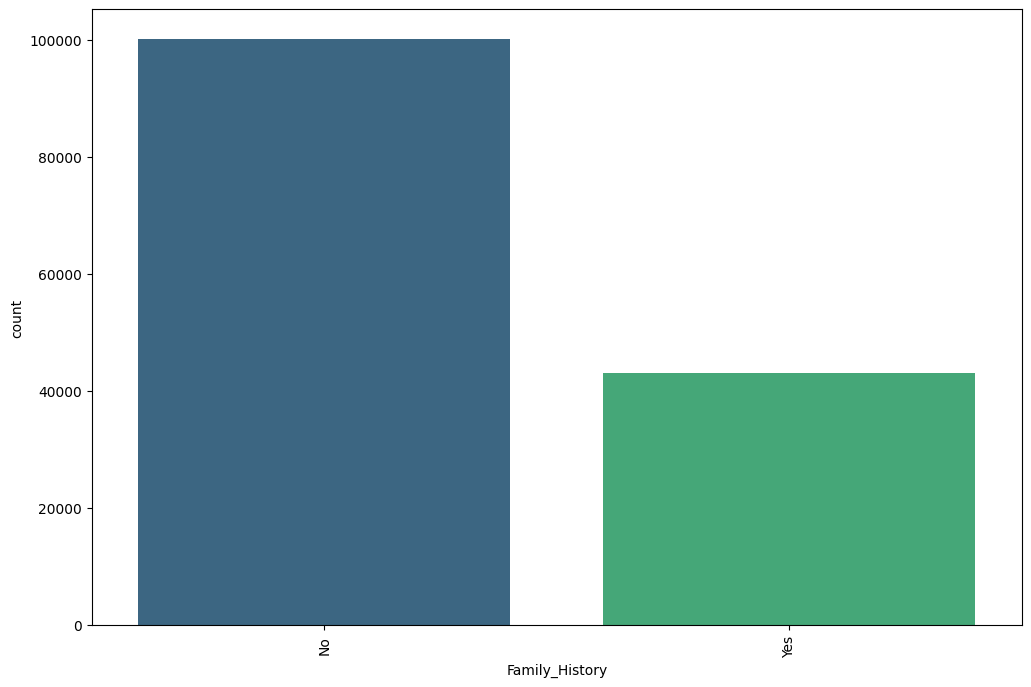

<ipython-input-10-cf251170fe6d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=df,palette='viridis',order=df[col].value_counts().index)


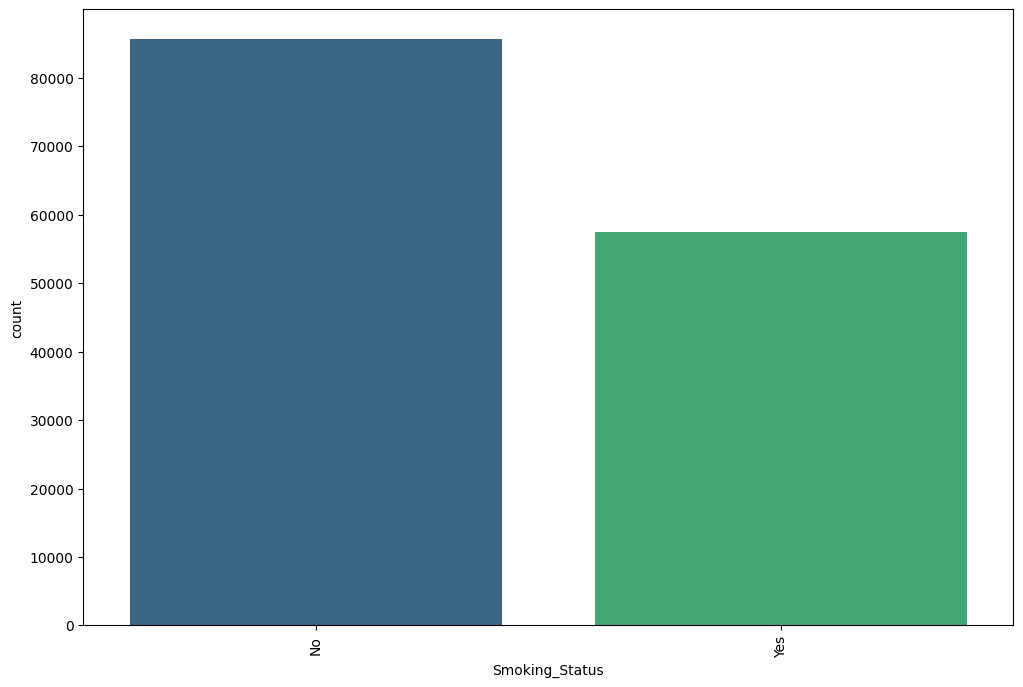

<ipython-input-10-cf251170fe6d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=df,palette='viridis',order=df[col].value_counts().index)


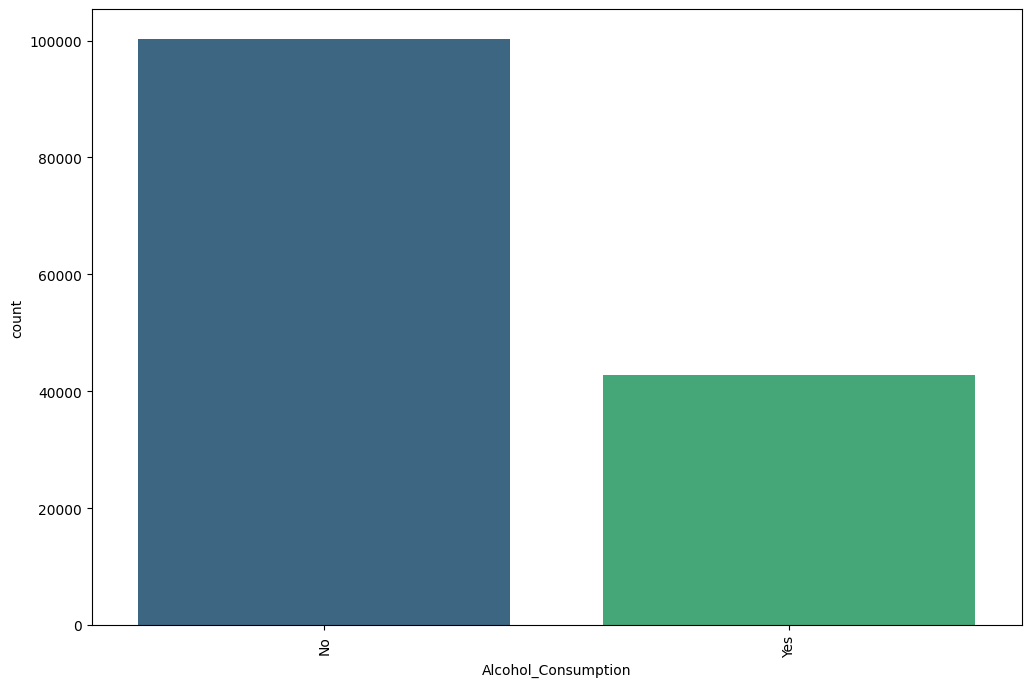

<ipython-input-10-cf251170fe6d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=df,palette='viridis',order=df[col].value_counts().index)


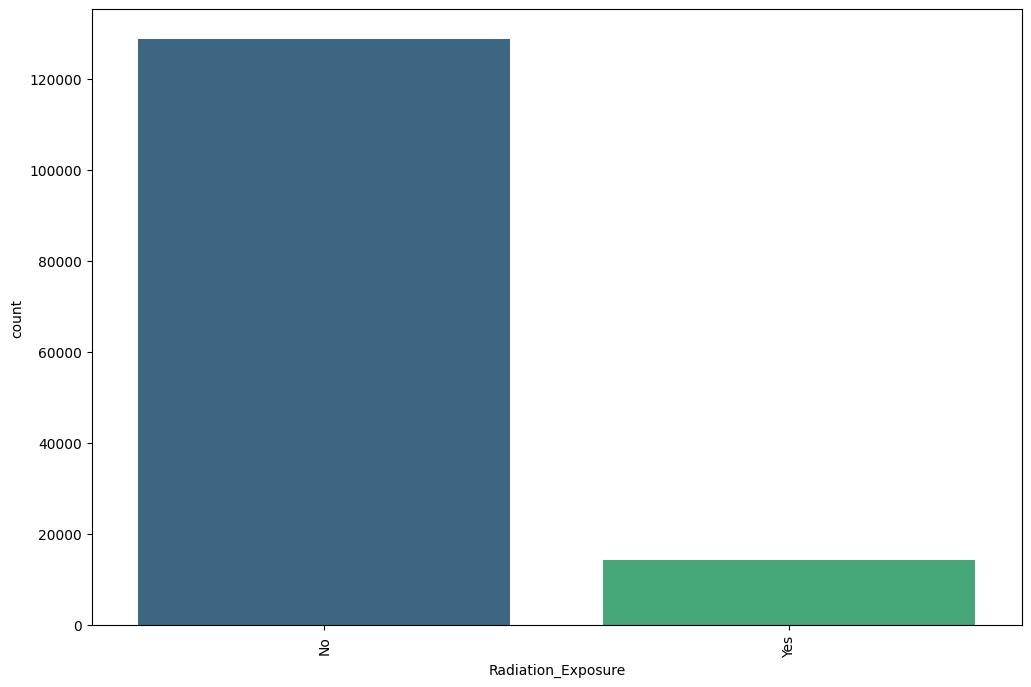

<ipython-input-10-cf251170fe6d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=df,palette='viridis',order=df[col].value_counts().index)


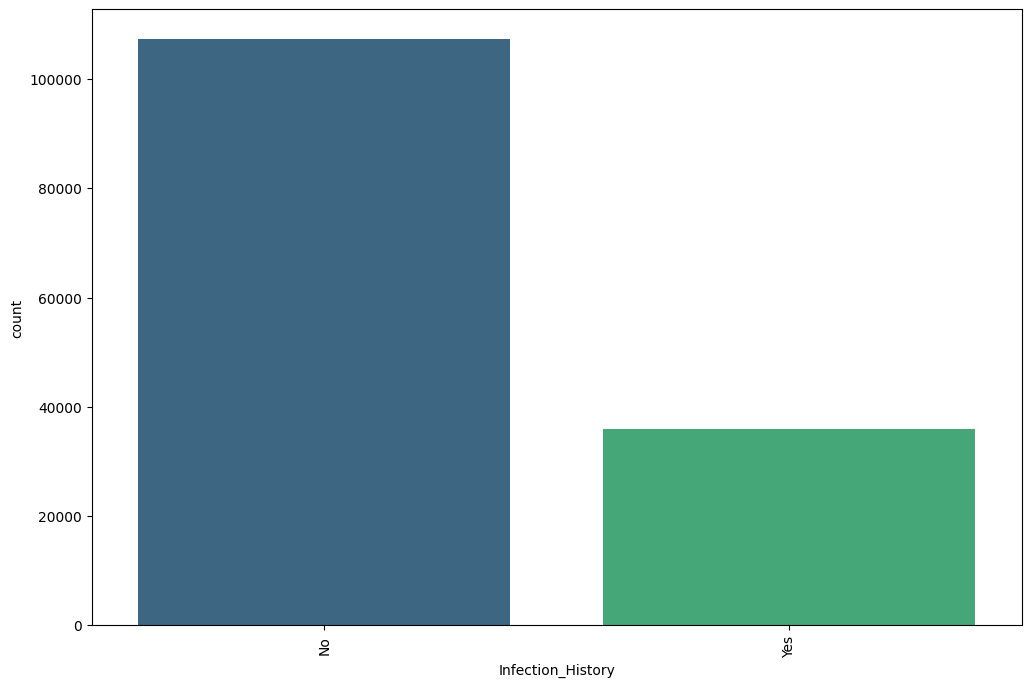

<ipython-input-10-cf251170fe6d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=df,palette='viridis',order=df[col].value_counts().index)


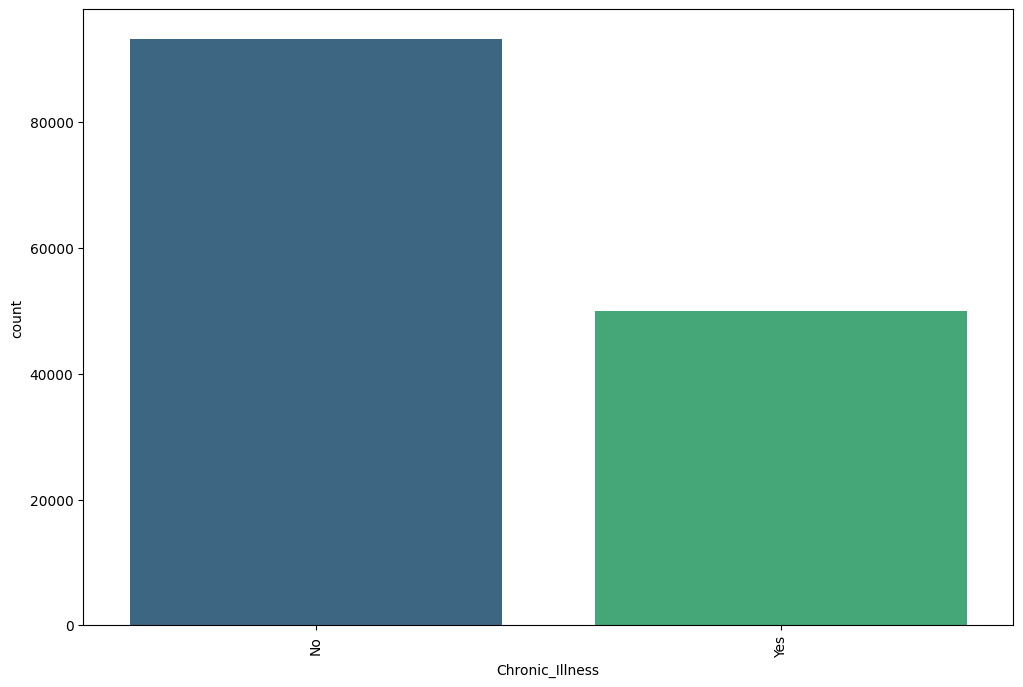

<ipython-input-10-cf251170fe6d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=df,palette='viridis',order=df[col].value_counts().index)


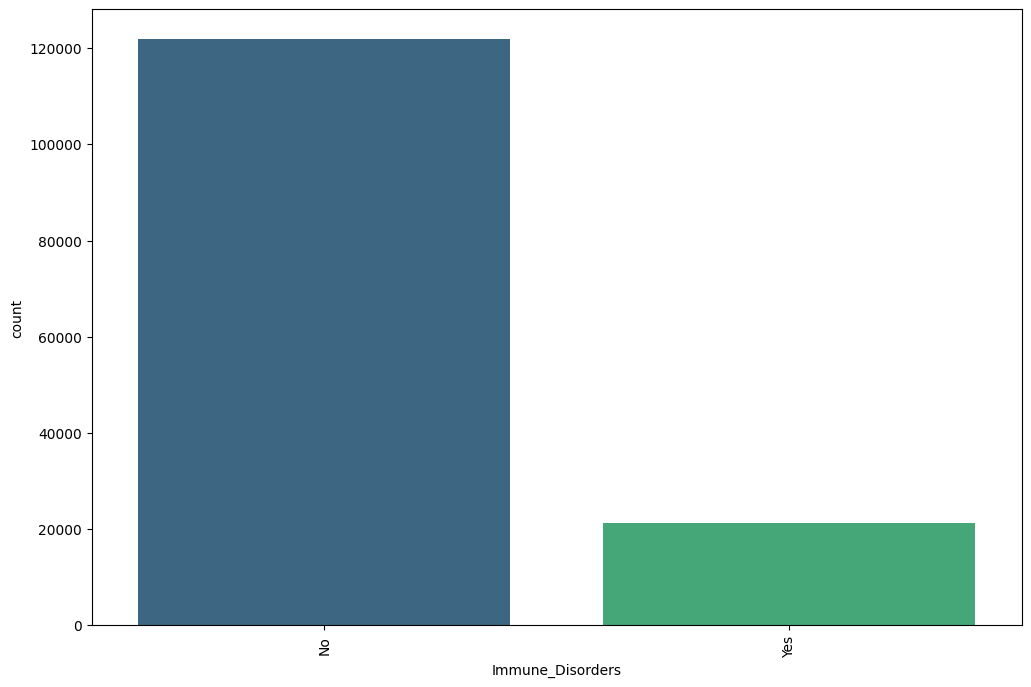

<ipython-input-10-cf251170fe6d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=df,palette='viridis',order=df[col].value_counts().index)


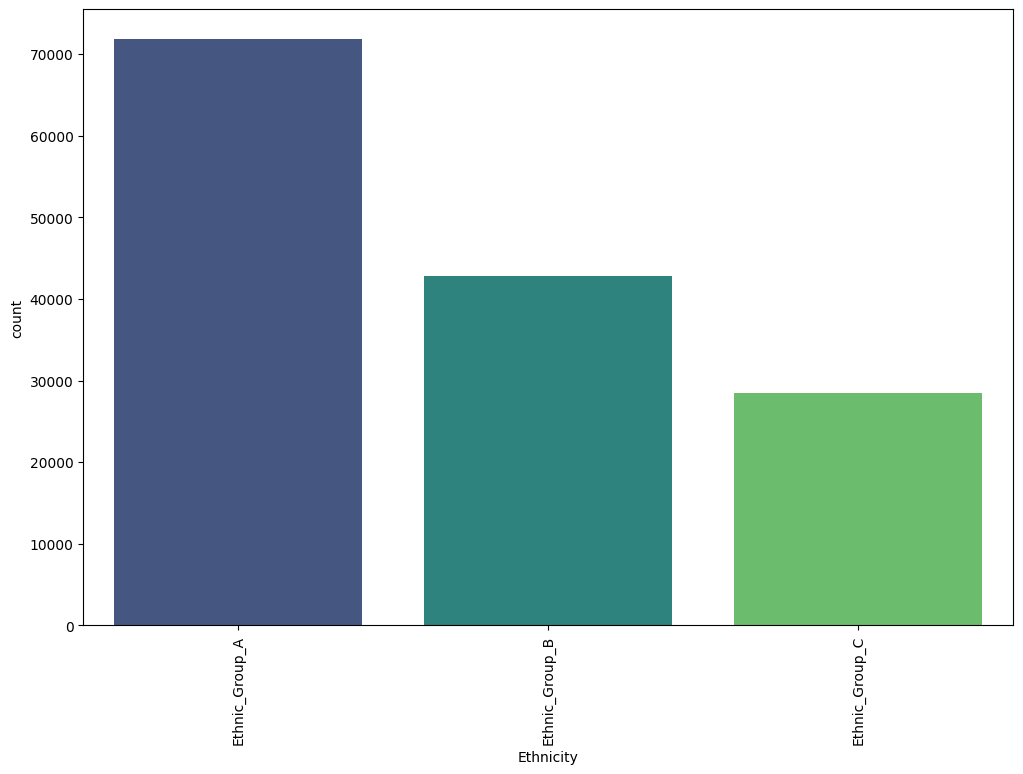

<ipython-input-10-cf251170fe6d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=df,palette='viridis',order=df[col].value_counts().index)


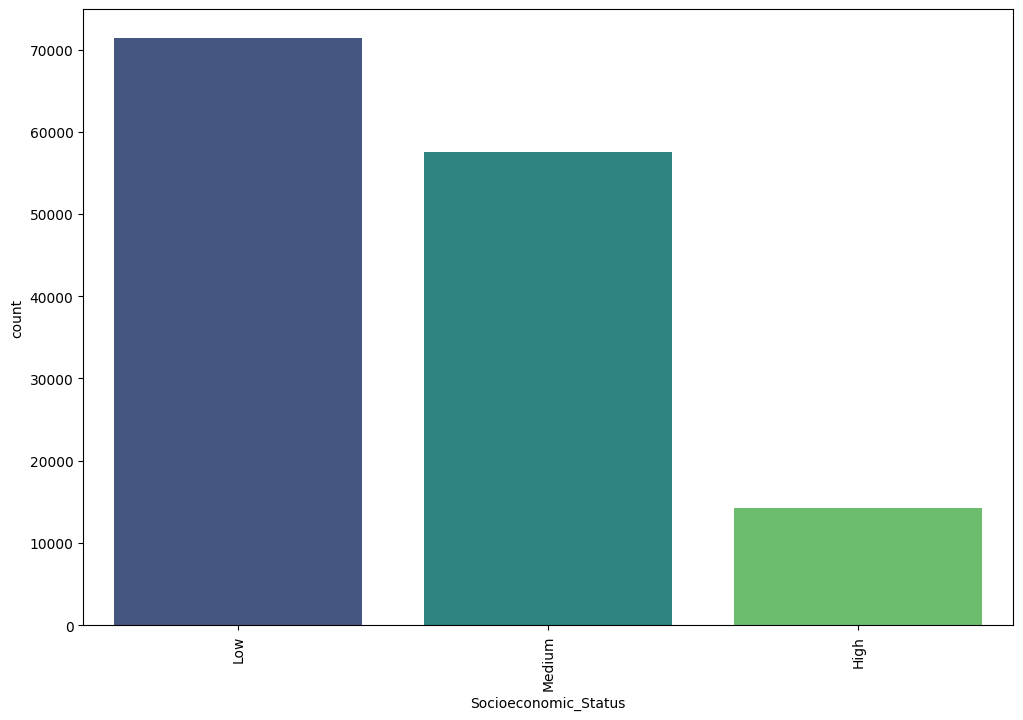

<ipython-input-10-cf251170fe6d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=df,palette='viridis',order=df[col].value_counts().index)


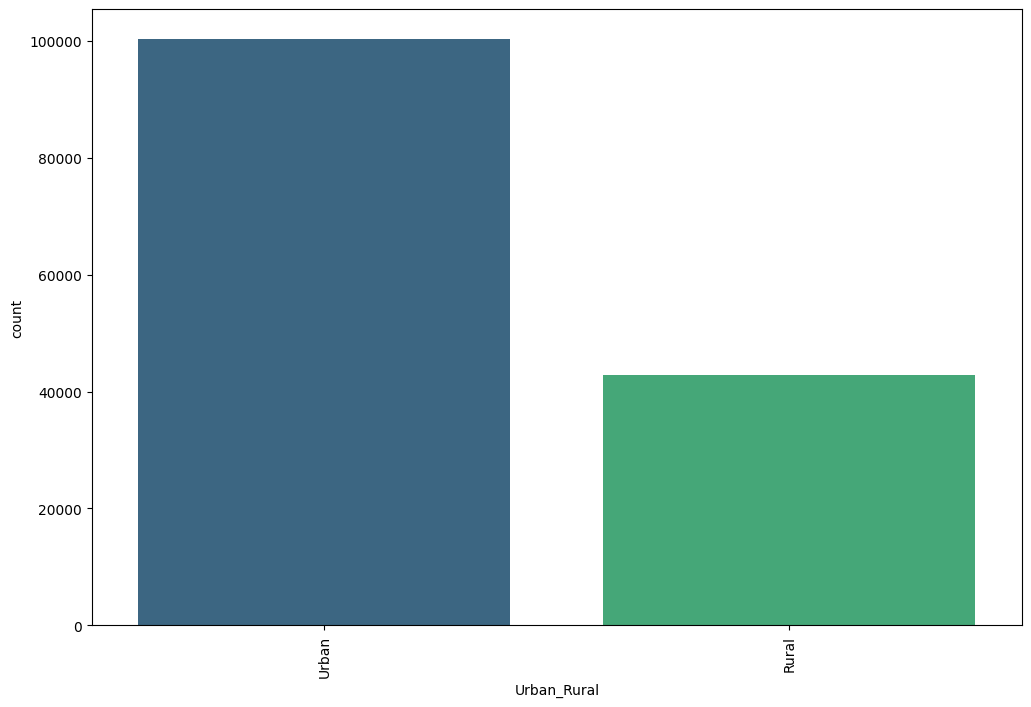

<ipython-input-10-cf251170fe6d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=df,palette='viridis',order=df[col].value_counts().index)


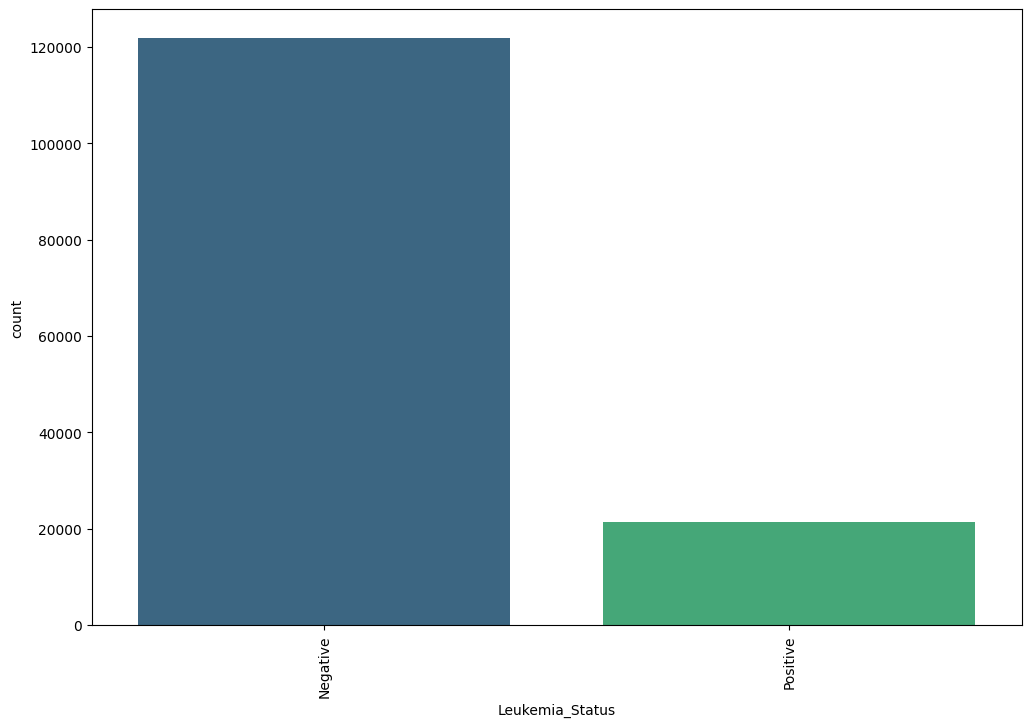

In [10]:
categorical_cols=[ 'Gender', 'Country','Genetic_Mutation', 'Family_History', 'Smoking_Status',
       'Alcohol_Consumption', 'Radiation_Exposure', 'Infection_History', 'Chronic_Illness', 'Immune_Disorders', 'Ethnicity',
       'Socioeconomic_Status', 'Urban_Rural', 'Leukemia_Status']
for col in categorical_cols:
  plt.figure(figsize=(12,8))
  sns.countplot(x=col,data=df,palette='viridis',order=df[col].value_counts().index)
  plt.xticks(rotation=90)
  plt.show()


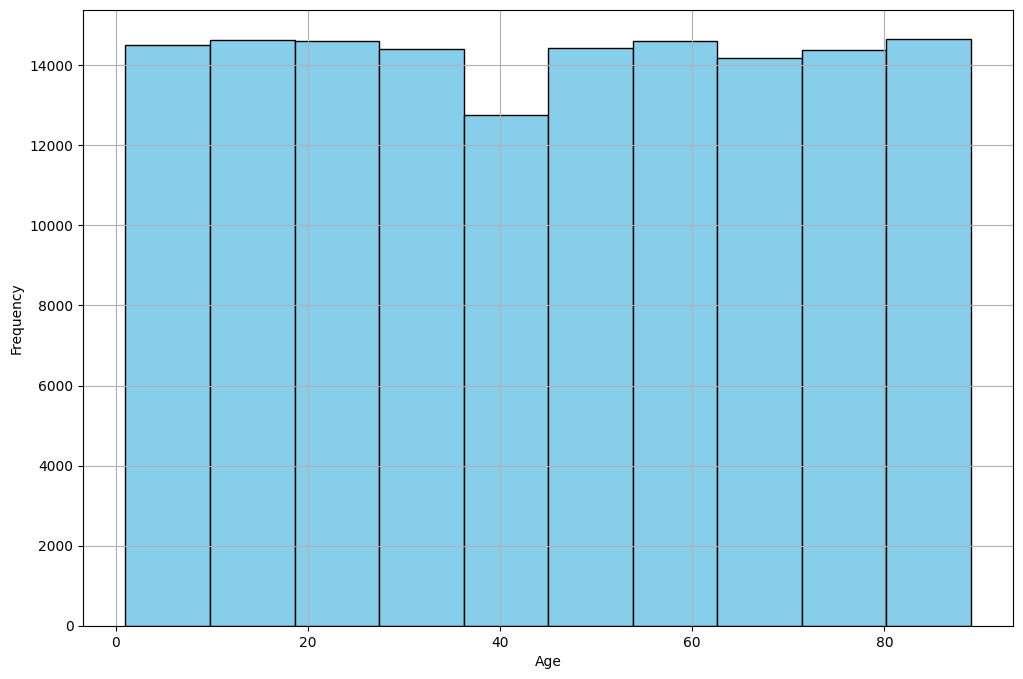

In [11]:
plt.figure(figsize=(12,8))
df['Age'].hist(bins=10,color='skyblue',edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


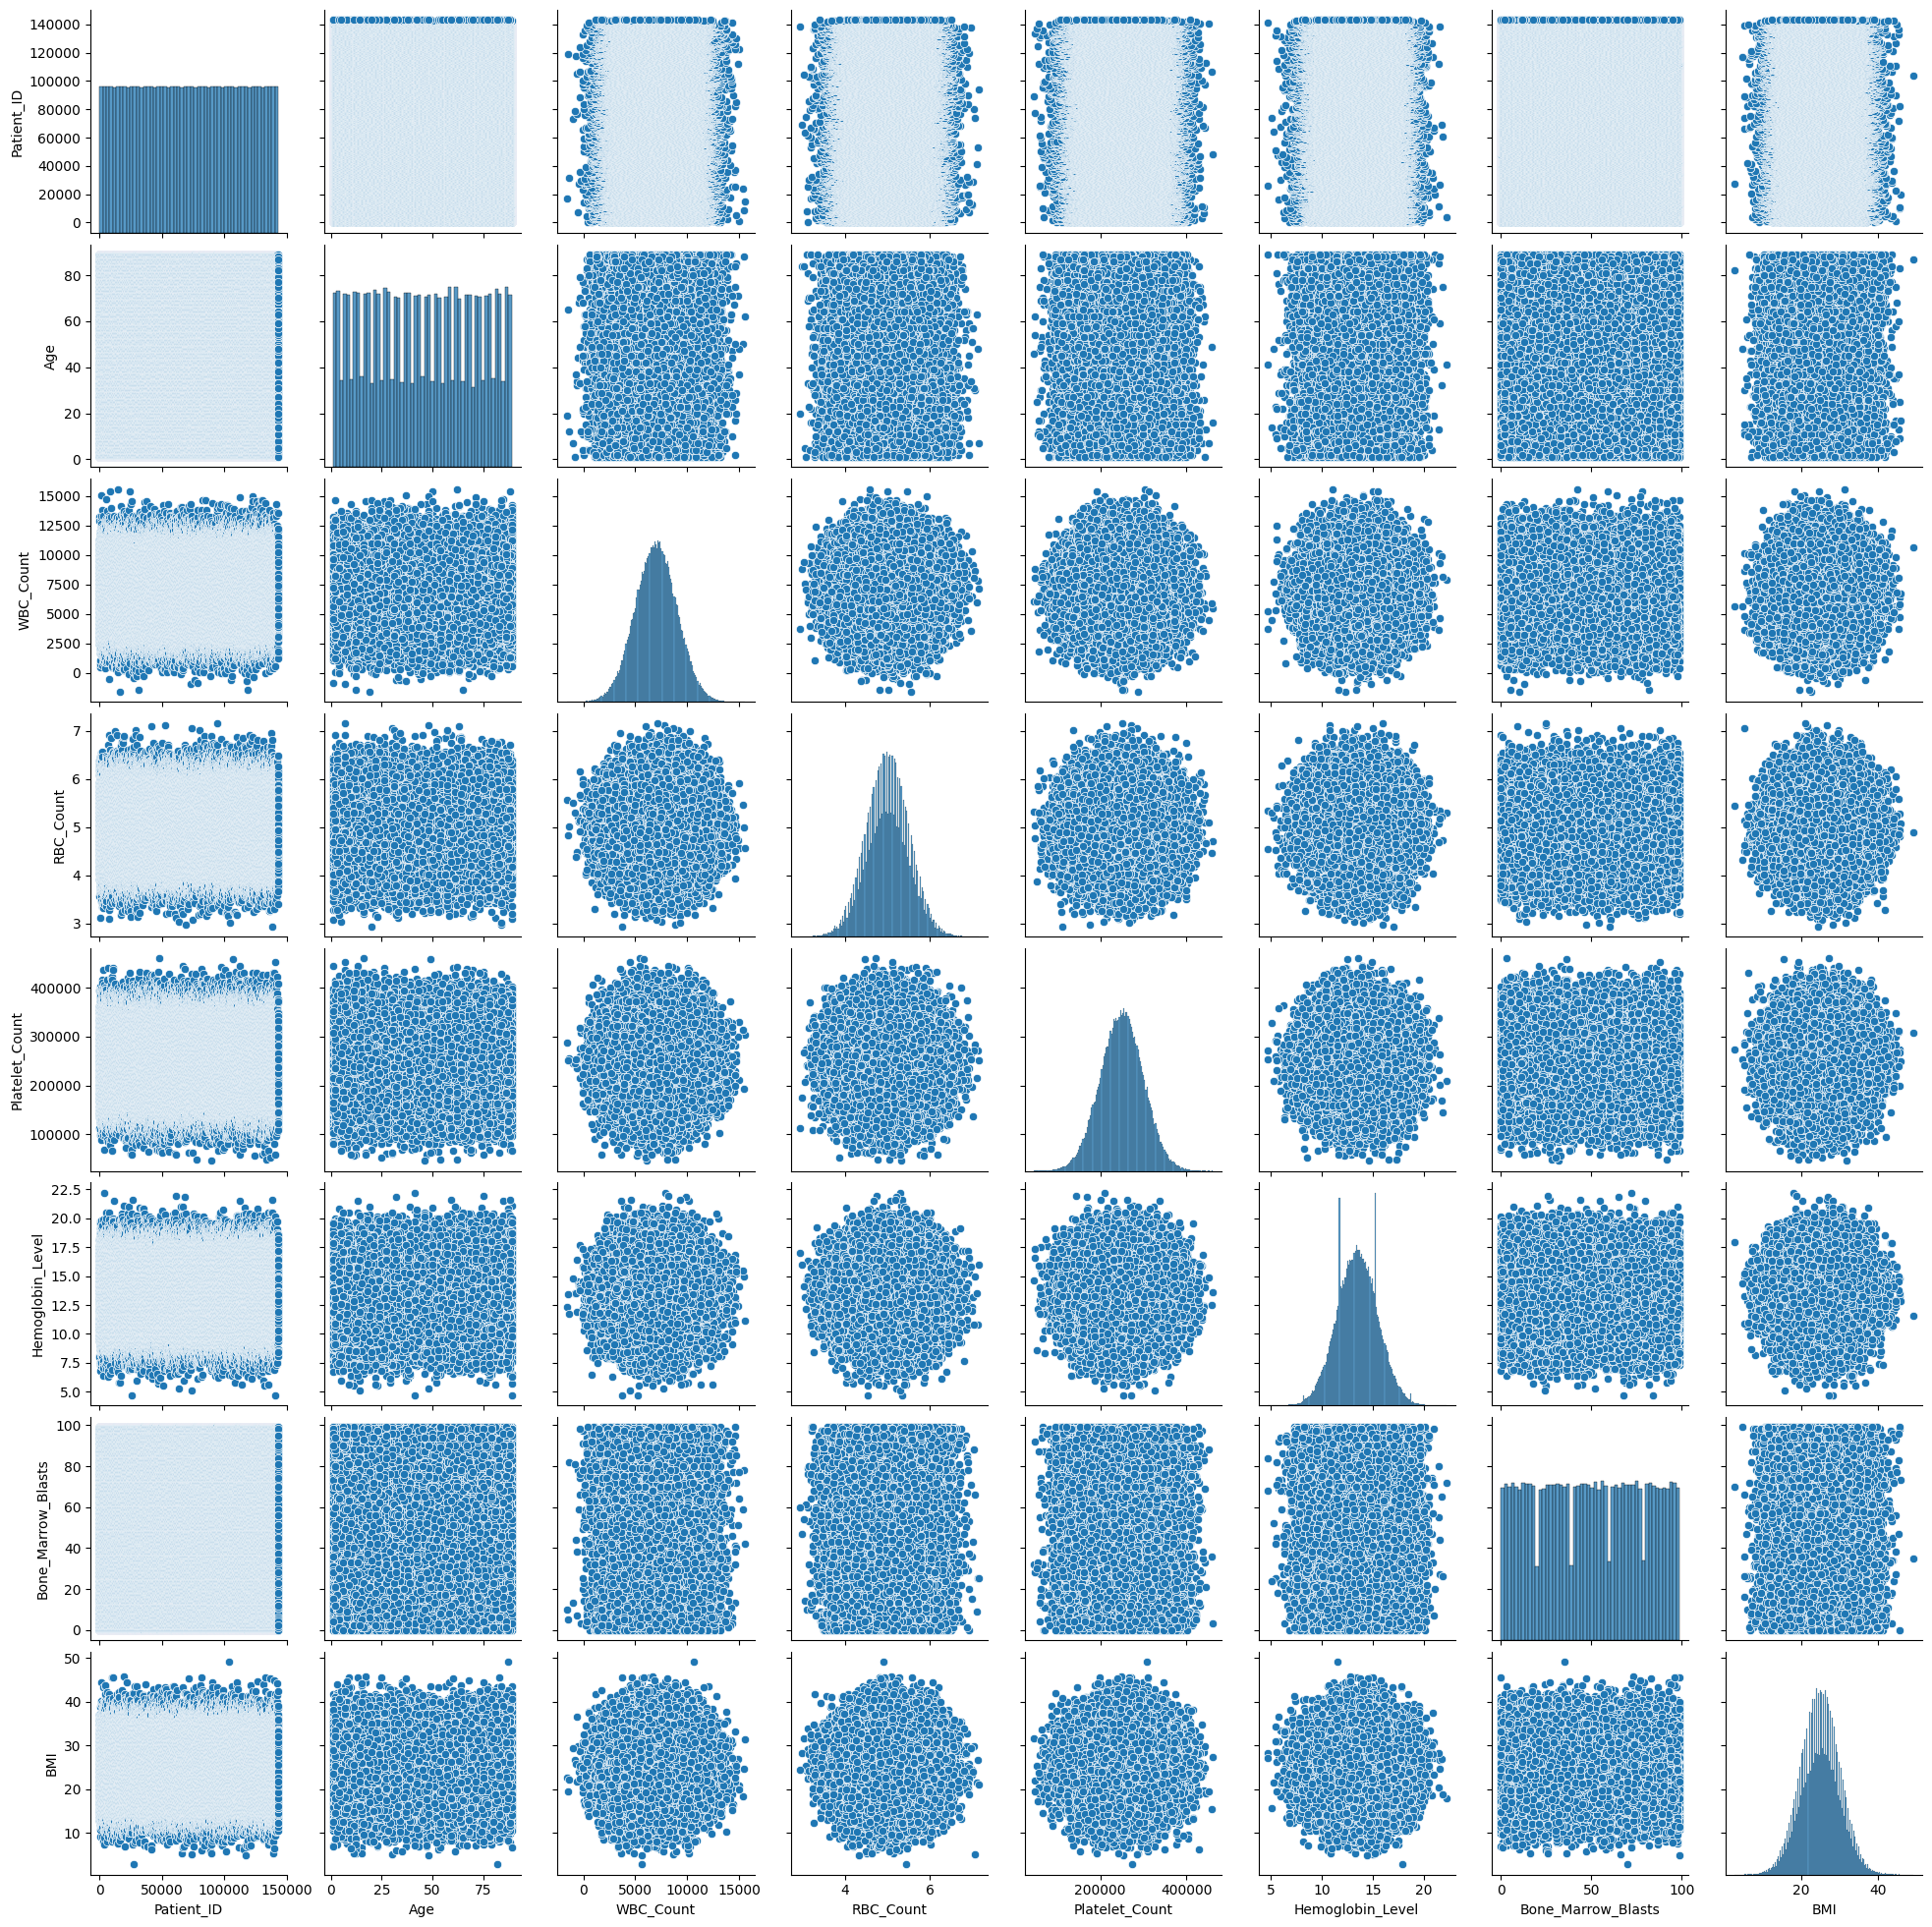

In [13]:
sns.pairplot(data=df)
plt.show()

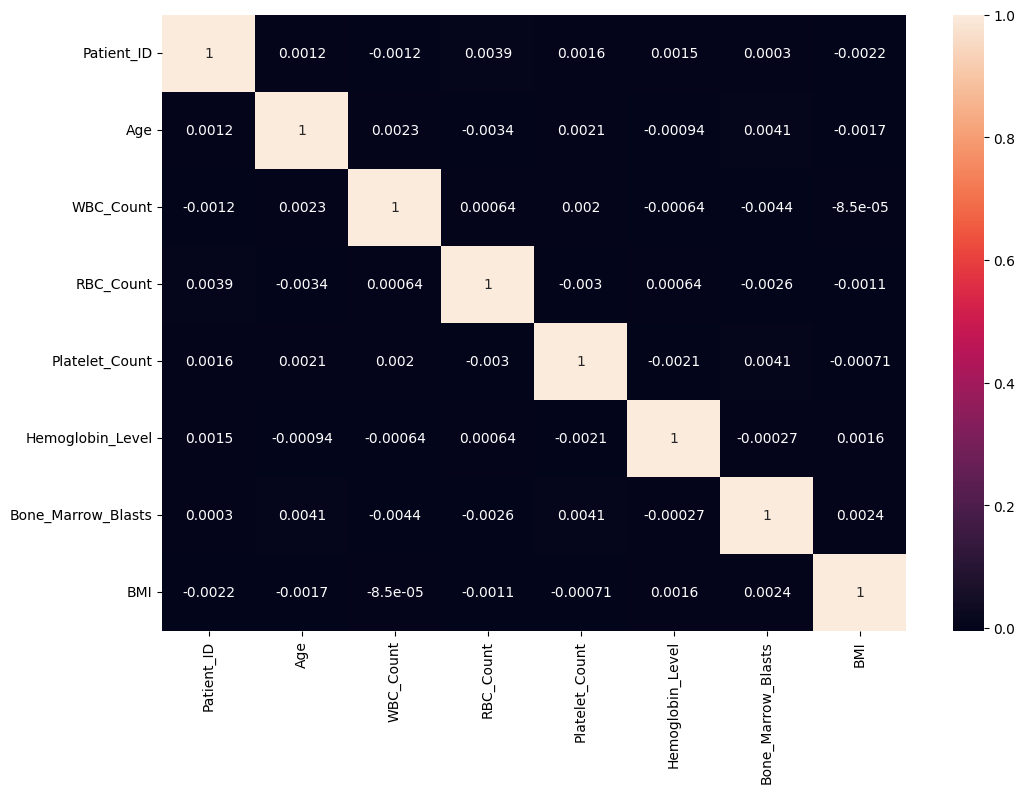

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

# Data Preprocessing

In [15]:
df.drop(columns=[ 'Patient_ID','Gender','Country','Urban_Rural','Ethnicity','Socioeconomic_Status'],inplace=True)

In [16]:
df["Leukemia_Status"] = df["Leukemia_Status"].map({"Positive": 1, "Negative": 0})


In [17]:
df.columns

Index(['Age', 'WBC_Count', 'RBC_Count', 'Platelet_Count', 'Hemoglobin_Level',
       'Bone_Marrow_Blasts', 'Genetic_Mutation', 'Family_History',
       'Smoking_Status', 'Alcohol_Consumption', 'Radiation_Exposure',
       'Infection_History', 'BMI', 'Chronic_Illness', 'Immune_Disorders',
       'Leukemia_Status'],
      dtype='object')

In [18]:
categorical_val=[ 'Genetic_Mutation', 'Family_History',
       'Smoking_Status', 'Alcohol_Consumption', 'Radiation_Exposure',
       'Infection_History','Chronic_Illness', 'Immune_Disorders']
for col in categorical_val:
  df[col] = df[col].map({"Yes": 1, "No": 0})


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143194 entries, 0 to 143193
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  143194 non-null  int64  
 1   WBC_Count            143194 non-null  int64  
 2   RBC_Count            143194 non-null  float64
 3   Platelet_Count       143194 non-null  int64  
 4   Hemoglobin_Level     143194 non-null  float64
 5   Bone_Marrow_Blasts   143194 non-null  int64  
 6   Genetic_Mutation     143194 non-null  int64  
 7   Family_History       143194 non-null  int64  
 8   Smoking_Status       143194 non-null  int64  
 9   Alcohol_Consumption  143194 non-null  int64  
 10  Radiation_Exposure   143194 non-null  int64  
 11  Infection_History    143194 non-null  int64  
 12  BMI                  143194 non-null  float64
 13  Chronic_Illness      143194 non-null  int64  
 14  Immune_Disorders     143194 non-null  int64  
 15  Leukemia_Status  

In [21]:
X=df.drop(columns=['Leukemia_Status'])
y=df['Leukemia_Status']

In [23]:
X_train,y_train,X_test,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
rf=RandomForestClassifier()

In [26]:
rf.fit(X,y)

RandomForestClassifier()

In [27]:
feature_importance=pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['Importance'])

In [29]:
feature_importance=feature_importance.sort_values('Importance',ascending=False)

<Figure size 1600x800 with 0 Axes>

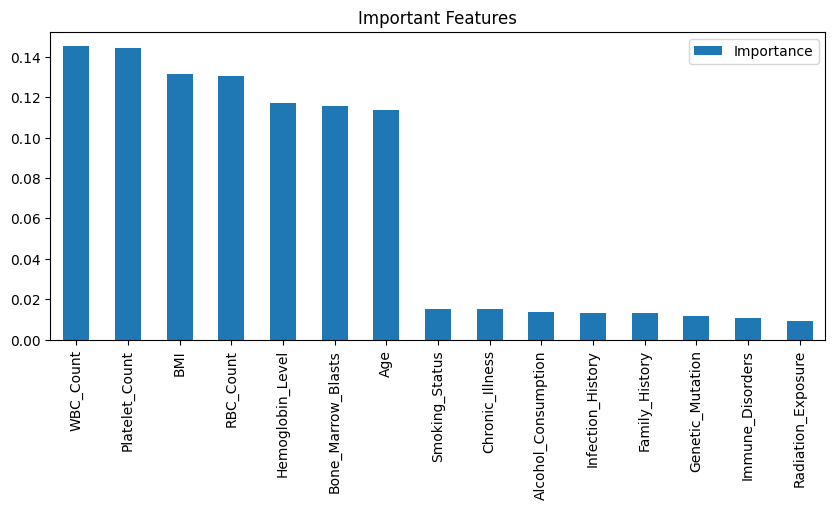

In [30]:
plt.figure(figsize=(16,8))
feature_importance.head(20).plot(kind='bar',figsize=(10,4))
plt.title('Important Features')
plt.show()

In [32]:
important_features = feature_importance[feature_importance['Importance'] > 0.02].index
X = df[important_features]
print("Shape for X Dataframe: ", X.shape)
print("Columns for X Dataframe: ", X.columns)

Shape for X Dataframe:  (143194, 7)
Columns for X Dataframe:  Index(['WBC_Count', 'Platelet_Count', 'BMI', 'RBC_Count', 'Hemoglobin_Level',
       'Bone_Marrow_Blasts', 'Age'],
      dtype='object')


In [33]:
sc=StandardScaler()

In [34]:
scaled_data = sc.fit_transform(X)


In [35]:
models={
    'Logistic Regression':LogisticRegression(random_state=42),
    'Random Forest':RandomForestClassifier(n_estimators=100,random_state=42),
    'XG Boost': XGBClassifier(),
    'Support Vector Machine':SVC(),
     'KNN': KNeighborsClassifier(n_neighbors=3),
}


In [36]:
def evaluate_model(model, X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)

    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred,average='weighted',zero_division=0)
    recall=recall_score(y_test,y_pred,average='weighted',zero_division=0)
    f1=f1_score(y_test,y_pred,average='weighted',zero_division=0)
    return accuracy,precision,recall,f1

In [37]:
results = []

for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

results_df = pd.DataFrame(results)
results_df

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model  Accuracy  Precision    Recall  F1-Score
0     Logistic Regression  0.849471   0.721601  0.849471  0.780332
1           Random Forest  0.849471   0.721601  0.849471  0.780332
2                XG Boost  0.849157   0.757062  0.849157  0.780444
3  Support Vector Machine  0.849471   0.721601  0.849471  0.780332
4                     KNN  0.808164   0.744110  0.808164  0.771152

Model        Logistic Regression
Accuracy                0.849471
Precision               0.721601
Recall                  0.849471
F1-Score                0.780332
Name: 0, dtype: object


<ipython-input-40-4821fb20a320>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


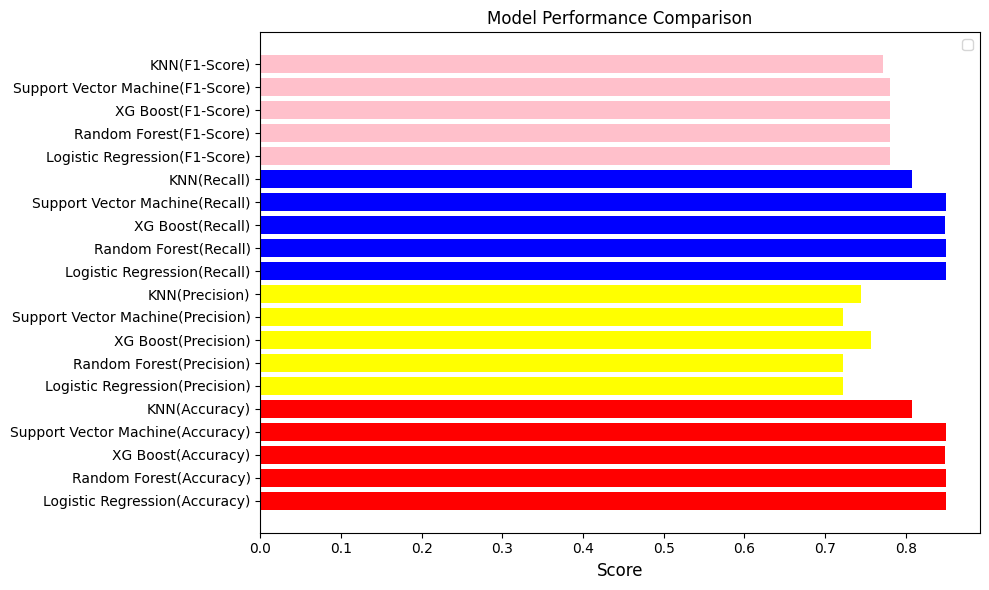

In [40]:
best_model=results_df.loc[results_df['Accuracy'].idxmax()]

print(best_model)
fig,ax=plt.subplots(figsize=(10,6))
metrics=['Accuracy','Precision','Recall','F1-Score']
colors=['red','yellow','blue','pink']
for i,metric in enumerate(metrics):
    ax.barh(results_df['Model'] + f'({metric})',results_df[metric],color= colors[i])

ax.set_xlabel('Score',fontsize=12)
ax.set_title('Model Performance Comparison')
ax.legend()
plt.tight_layout()
plt.show()

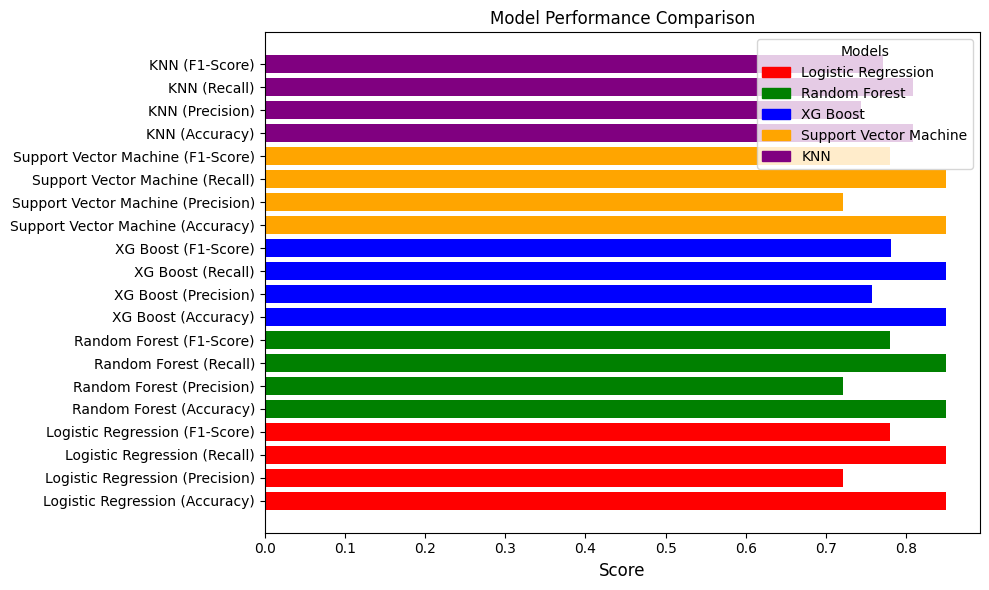

In [41]:
models = results_df['Model'].unique()
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan']  # Adjust as needed
model_colors = dict(zip(models, colors))

fig, ax = plt.subplots(figsize=(10, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

bars = []

for i, model in enumerate(results_df['Model']):
    for j, metric in enumerate(metrics):
        label = f"{model} ({metric})"
        score = results_df.loc[i, metric]
        color = model_colors[model]
        bar = ax.barh(label, score, color=color)
        bars.append(bar)

ax.set_xlabel('Score', fontsize=12)
ax.set_title('Model Performance Comparison')
custom_legend = [plt.Rectangle((0, 0), 1, 1, color=color) for color in model_colors.values()]
ax.legend(custom_legend, model_colors.keys(), title='Models')
plt.tight_layout()
plt.show()